## Prediksi penumpang Kapal Titanik menggunakan KNN

In [1]:
#IMPORT LIBRARI YANG DIGUNAKAN
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
#IMPORT DATASET
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
#MENAMPIKAN DATASET
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


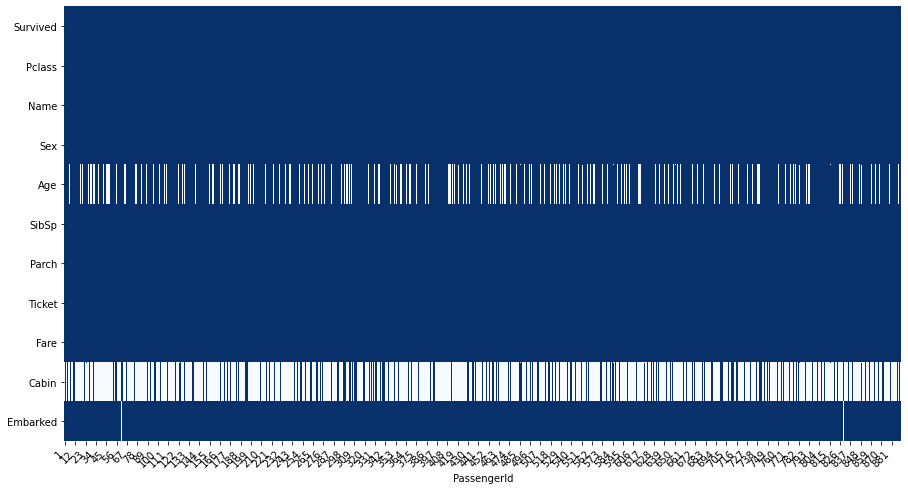

In [3]:
#MELIHAT BANYAKNYA DATA KOSONG
plot_missing_value(df)

In [4]:
#HAPUS FEATURE YANG TIDAK DIGUNAKAN
df.drop(columns=["Name", "Ticket", "Age", "Cabin"], inplace=True)

In [5]:
#DATASET SPLITING 
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [6]:
#PIPELINE NUMERIK
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])

In [7]:
#PIPELINE KATEGORIK
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", MinMaxScaler())
])

In [8]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["SibSp","Parch","Fare"]),
    ('categoric', cat_pipe(encoder='onehot'), ["Pclass","Sex","Embarked"]),
])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [10]:
#TRAINING
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s


{'algo__n_neighbors': 29, 'algo__p': 1, 'algo__weights': 'distance'}
0.9283707865168539 0.7837345908827666 0.8044692737430168


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   12.9s finished


In [11]:
#FORMAT DATASET
X.iloc[0:1]

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,3,male,1,0,7.25,S


In [12]:
#membuat dataframe baru untuk prediksi
datanew =[
    [1,"female",1, 1, 80, "s"],
    [3,"male",1, 0, 5, "s"]
    ]
X_prediksi = pd.DataFrame(datanew, index=["rose", "Jack"], columns=X.columns)
X_prediksi

,Pclass,Sex,SibSp,Parch,Fare,Embarked
rose,1,female,1,1,80,s
Jack,3,male,1,0,5,s


In [13]:
model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                    

In [14]:
model.predict(X_prediksi)

array([1, 0], dtype=int64)

In [15]:
X_prediksi["Survived"] = model.predict(X_prediksi)
X_prediksi

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
rose,1,female,1,1,80,s,1
Jack,3,male,1,0,5,s,0


In [16]:
from jcopml.utils import save_model

In [17]:
save_model(model, "Knn_titanicnew.pkl")

Model is pickled as model/Knn_titanicnew.pkl
